#Import Libraries and declare global variables

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from mat4py import loadmat
import math
import cv2

votingMatrix = radius = 0 
h = w = 0

#read the mat file cordinates and save them in a list

In [37]:
def appendList(i, j, orientation, rTable):

    lists = rTable[orientation]
    for x, y in lists:
        ci , cj = i - x ,  j - y
        if(ci < h and cj < w):
            votingMatrix[ci, cj] = votingMatrix[ci, cj] + 1

#Generalised training function for circle using Generalised Hough Transform. We can use same function for different shapes

In [38]:

def myHoughCircleTrain(imgArray, center, ptlist):
    x, y = imgArray.shape
    yourcellvar = []

    dx = cv2.Sobel(imgArray, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(imgArray, cv2.CV_64F, 0, 1, ksize=5)
    orientation = np.arctan2(dy, dx)

    yourcellvar.append([center[0] , center[1], orientation[center[0], center[1]] , 0, 0])

    for point in ptlist:
        temp = (center[0] - point[0])**2 + (center[1] - point[1])**2 
        global radius
        radius = radius + int(math.sqrt(temp))

        x1, y1 = (center[0] - point[0]), (center[1] - point[1])
        orientation_xy = orientation[point[0], point[1]]
        yourcellvar.append([point[0] , point[1], orientation_xy , x1, y1])
    
    #create R table 
    rTable = dict()
    for i in range(1, len(yourcellvar)):         
        if yourcellvar[i][2] in rTable :            
            rTable[yourcellvar[i][2]].append([yourcellvar[i][3], yourcellvar[i][4]])           
        else : 
            rTable[yourcellvar[i][2]] = [[yourcellvar[i][3], yourcellvar[i][4]]]

    radius = math.ceil(radius / len(ptlist))
    return rTable


#Predict function for finding similar shapes from test image

In [39]:
def myHoughCircleTest(imgArray_test, rTable): 
    dx = cv2.Sobel(imgArray_test, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(imgArray_test, cv2.CV_64F, 0, 1, ksize=5)
    orientation = np.arctan2(dy, dx)

    o = rTable.keys() 
    
    global h, w
    h, w = imgArray_test.shape

    for i in range(h): 
        for j in range(w): 
            if( imgArray_test[i, j] == 1 and  orientation[i, j] in o): 
                appendList(i, j, orientation[i, j], rTable) 

#main function

*   Loads data
*   Train the shape using train image
*   Predict same shapes from test image
*   Display





In [40]:
def main():   

    data = loadmat('/content/drive/My Drive/CV/train.mat')
    center = data['c']
    ptlist = data['ptlist']

    image = "/content/drive/My Drive/CV/train.png"
    test_image = "/content/drive/My Drive/CV/test.png"

    imgArray = plt.imread(image)
    imgArray_test = plt.imread(test_image)

    global votingMatrix
    votingMatrix = np.zeros(imgArray_test.shape)
    rTable = myHoughCircleTrain(imgArray, center, ptlist)
    
    myHoughCircleTest(imgArray_test, rTable)    
    max = np.max(votingMatrix)    
    lists = np.where(votingMatrix == max)

    fig, axs = plt.subplots(1, 2, figsize=(30,30))
    axs[0].imshow(imgArray, cmap = 'gray')
    axs[0].set_title("Training image", fontsize=20)
    axs[1].set_title("Test image - red dot highlights the similar circle", fontsize=20)
    axs[1].imshow(imgArray_test, cmap='gray')
    #showing top 3
    print("Top 3 reference points with radius = ", radius)
    for i in range(0, 3): 
        print("X : ", lists[1][i], " Y : ", lists[0][i])
        axs[1].scatter(lists[1][i], lists[0][i], c='r', s=1.5)
    print()
    plt.show()

Top 3 reference points with radius =  10
X :  193  Y :  22
X :  92  Y :  107
X :  76  Y :  126



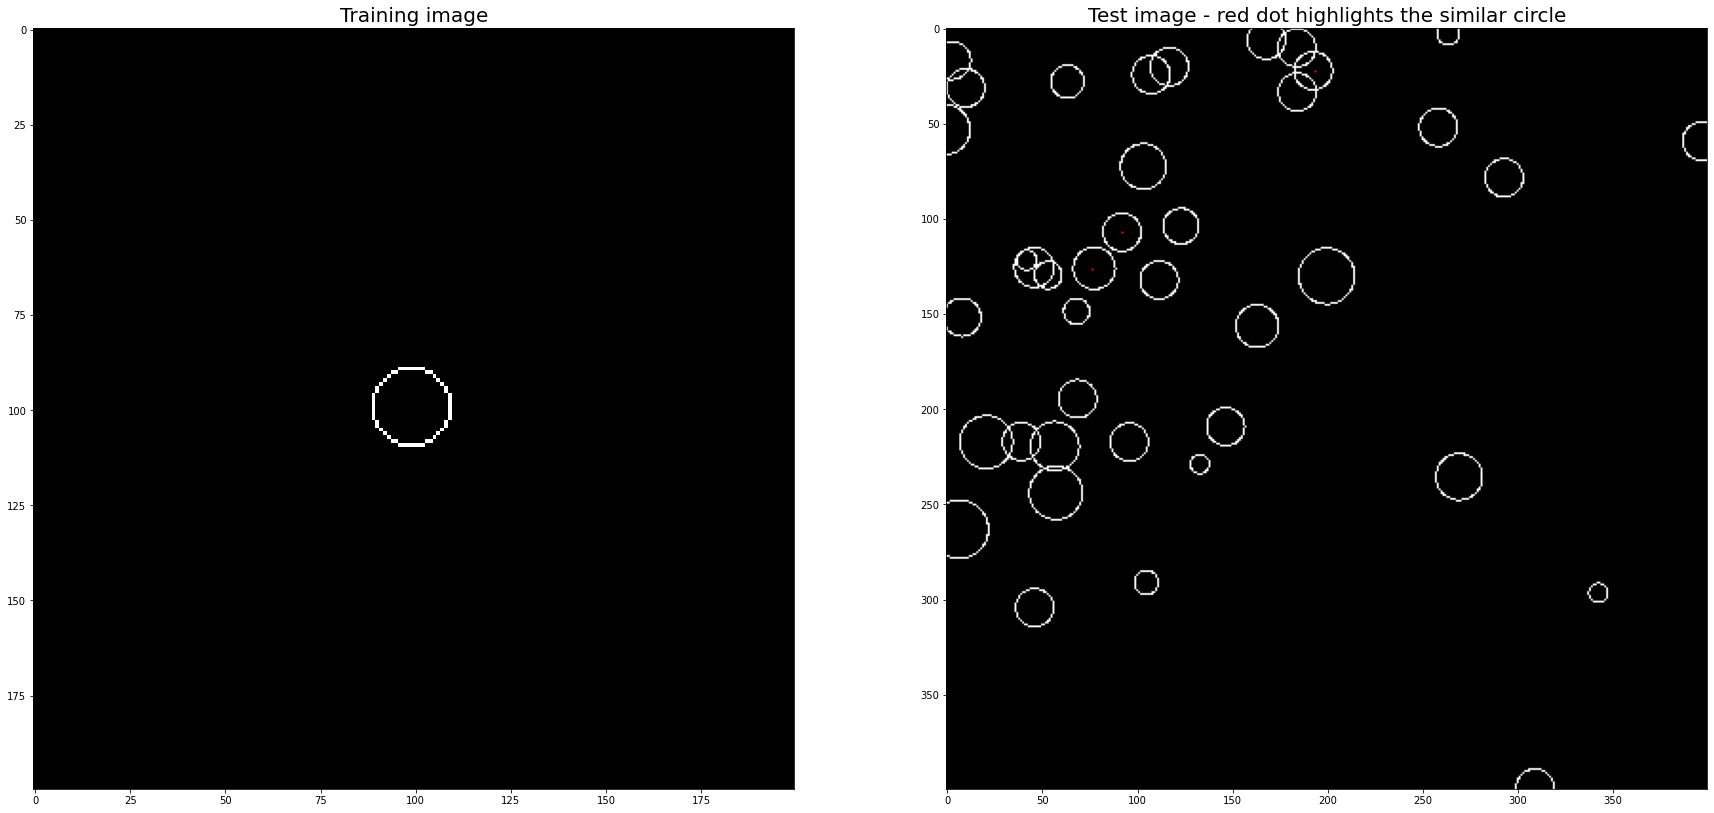

In [41]:
if __name__ == "__main__":
    main()